In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MEGALA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
df=pd.read_csv(r"C:\Users\MEGALA\Desktop\Megala\Sample data\demonetization-tweets.csv", encoding='ISO-8859-1')

In [4]:
df.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


In [12]:
df.shape

(14940, 16)

In [13]:
df['text'].isnull().sum()

0

In [14]:
df.head(10)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


In [15]:
def clean(x):
    x=re.sub('[^a-zA-Z]',' ',x)
    x=x.lower().split()
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    return(' '.join(words))
    

In [16]:
df['text']=df['text'].apply(lambda x: clean(x))

In [17]:
df.head(5)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,rt rssurjewala critical question paytm informe...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,rt hemant vote demonetization modi survey app,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,rt roshankar former finsec rbi dy governor cbd...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,rt ani news gurugram haryana post office emplo...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,rt satishacharya reddy wedding mail today cart...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [19]:
df['sentiment_compound_polarity']=df.text.apply(lambda x:sid.polarity_scores(x)['compound'])
df['positive']=df.text.apply(lambda x:sid.polarity_scores(x)['pos'])
df['negative']=df.text.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment']=df.sentiment_compound_polarity.apply(lambda x: 1 if x>0 else (-1 if x<0 else 0))

In [20]:
df.head(5)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,positive,negative,sentiment
0,1,1,rt rssurjewala critical question paytm informe...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.15,0.128,1
1,2,2,rt hemant vote demonetization modi survey app,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,0.00,0.000,0
2,3,3,rt roshankar former finsec rbi dy governor cbd...,False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,0.00,0.000,0
3,4,4,rt ani news gurugram haryana post office emplo...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,0.00,0.000,0
4,5,5,rt satishacharya reddy wedding mail today cart...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,0.00,0.000,0


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [27]:
positive_count=(df['sentiment']>0).sum()
negative_count=(df['sentiment']<0).sum()
neutral_count=(df['sentiment']==0).sum()
Sentiment={'Positive':positive_count,'Negative':negative_count,'Neutral':neutral_count}

In [29]:
x=list(Sentiment.keys())
y=list(Sentiment.values())

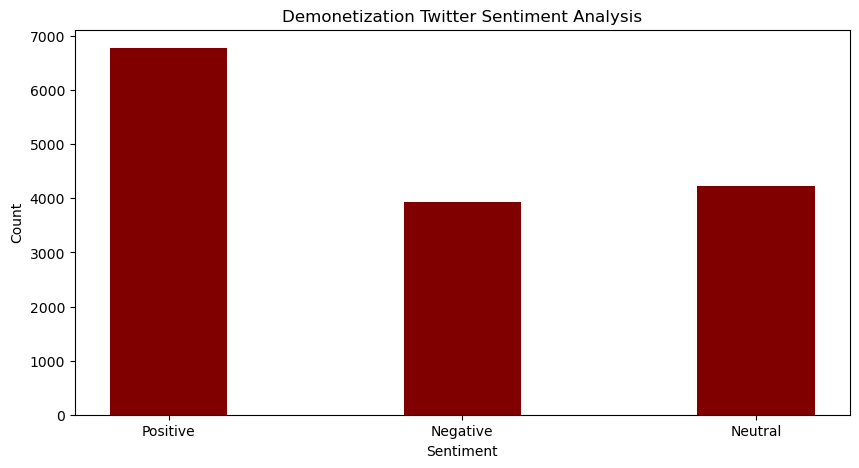

In [31]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.bar(x,y,color='maroon',width=0.4)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Demonetization Twitter Sentiment Analysis")
plt.show()